<a href="https://colab.research.google.com/github/BuseYarenTekin/faster-r-cnn-tensorflow-api-custom/blob/main/Training_Faster_R_CNN_Using_TensorFlow_Object_Detection_API_with_Custom%C2%A0Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Training Faster R-CNN Using TensorFlow Object Detection on a Custom Dataset**

### **Overview**

This notebook describes how to create a Faster R-CNN Object Detection model using the TensorFlow Object Detection API.

### **Steps**
**1.** Creating anaconda environment and requirements

**2.** Upload the Tensorflow model file

**3.** Put the **Faster R-CNN Inception V2** model in the object detection folder

**4.** Specify **PYTHON_PATH** as a system environment variable

**5.** Running a Protoc file in the research folder

**6.** Running a **setup.py** file in the research folder

**7.** Converting the prepared data set's XML files to CSV

**8.** Enter your classes in the **generate_tfrecord.py** file

**9.** Generate_tf_record.py files are run for training and testing sets

**10.** Create a file named **labelmap.pbtxt** in the directory models/research/ object_detection/training

**11.** Train the model with train.py file

**12.** Inference Graph stage for test results with **export_inference_graph.py**

## Step 1: Create a virtual environment via conda

In [ ]:
conda create -n myenv python=3.6
conda activate myenv

### Step 1.1: Installing the TensorFlow GPU

In [ ]:
conda install tensorflow-gpu==1.15.0

### Step 1.2: The protobuf compiler is installed in Anaconda Prompt.

In [ ]:
conda install -c anaconda protobuf

### Step 1.3: After a new virtual environment is installed, load it from within the requirements.txt file.

https://github.com/BuseYarenTekin/faster-r-cnn-tensorflow-api-custom/blob/main/requirements.txt

In [ ]:
pip install -r requirements.txt

## Step 2: Upload the Tensorflow model file
The model file must be downloaded from https://github.com/tensorflow/models.

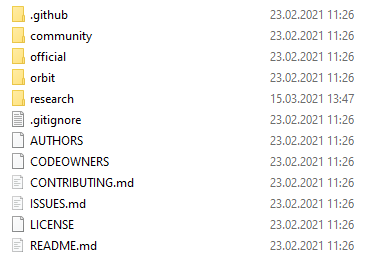

## Step 3:  Put the Faster R-CNN Inception V2 model in the object detection folder
Move the model in the repo, the file faster_rcnn_inception_v2_coco_2018_01_28 to the models/research/object_detection directory

https://github.com/BuseYarenTekin/faster-r-cnn-tensorflow-api-custom/tree/main/faster_rcnn_inception_v2_coco_2018_01_28

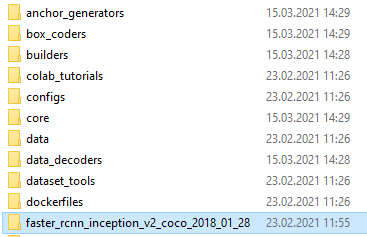

## Step 4: Specify PYTHON_PATH as a system environment variable
**Create a new system variable**
1. Manually setting PYTHONPATH from environment variables;

  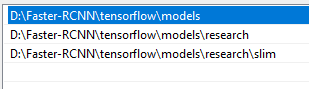
2. Setting PYTHONPATH from terminal with code
  > SET PYTHONPATH= D:\Faster R-CNN\tensorflow\models;D:\FasterR-CNN\tensorflow\models\research;  D:\Faster R-CNN\tensorflow\research\slim

## Step 5: Running a Protoc file in the research folder

In [ ]:
protoc --python_out=. .\object_detection\protos\anchor_generator.proto .\object_detection\protos\argmax_matcher.proto .\object_detection\protos\bipartite_matcher.proto .\object_detection\protos\box_coder.proto .\object_detection\protos\box_predictor.proto .\object_detection\protos\eval.proto .\object_detection\protos\faster_rcnn.proto  .\object_detection\protos\faster_rcnn_box_coder.proto .\object_detection\protos\flexible_grid_anchor_generator.proto .\object_detection\protos\calibration.proto .\object_detection\protos\hyperparams.proto .\object_detection\protos\image_resizer.proto .\object_detection\protos\input_reader.proto .\object_detection\protos\losses.proto .\object_detection\protos\matcher.proto .\object_detection\protos\mean_stddev_box_coder.proto .\object_detection\protos\model.proto .\object_detection\protos\optimizer.proto .\object_detection\protos\pipeline.proto .\object_detection\protos\post_processing.proto .\object_detection\protos\preprocessor.proto .\object_detection\protos\region_similarity_calculator.proto .\object_detection\protos\square_box_coder.proto .\object_detection\protos\ssd.proto .\object_detection\protos\ssd_anchor_generator.proto .\object_detection\protos\string_int_label_map.proto .\object_detection\protos\train.proto .\object_detection\protos\keypoint_box_coder.proto .\object_detection\protos\multiscale_anchor_generator.proto .\object_detection\protos\graph_rewriter.proto .\object_detection\protos\center_net.proto .\object_detection\protos\grid_anchor_generator.proto .\object_detection\protos\fpn.proto .\object_detection\protos\target_assigner.proto

## Step 6: Running a setup.py file in the research folder

In [ ]:
python setup.py build
python setup.py install

## Step 7: Converting the prepared data set's XML files to CSV
In this step, the data to be used to test and train the folders must be moved to the models/research/object_detection/images directory.


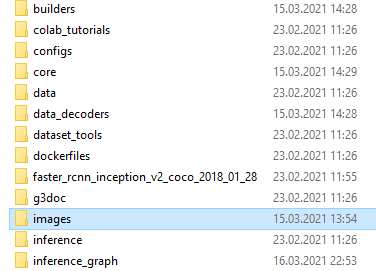

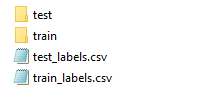

Run the code below in models/research/object_detection directory. In the images folder, test_labels.csv and train_labels.csv csv files will be created.

In [ ]:
python xml_to_csv.py

## Step 8: Enter classes in the generate_tfrecord.py file
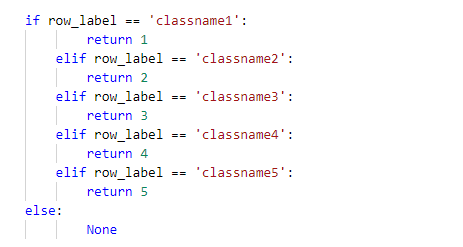

## Step 9: Generate_tf_record.py files are run for training and testing sets

Run the code below in models/research/object_detection directory.

In [ ]:
python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

## Step 10: Create a file named **labelmap.pbtxt** in the directory models/research/ object_detection/training
The first thing to do in this step is to move files faster_rcnn_inception_v2_pets.config, graph.pbtxt into models/research/object_detection/training directory. 

After the generate_tf_record file is executed, a labelmap will be created automatically. It can be controlled by going to the labelmap in the folder as follows.

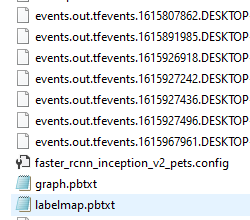

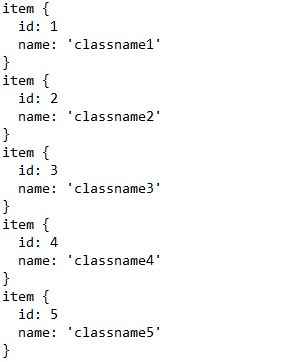

Change lines in faster_rcnn_inception_v2_pets.config as below in models/research/object_detection/training directory.

**( Sample change for 5 classes)**

*   Line 9: # write class count

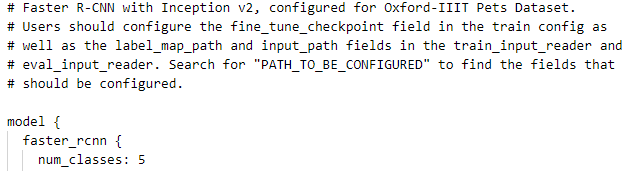

* Line 106: Write your fine_tune_checkpoint
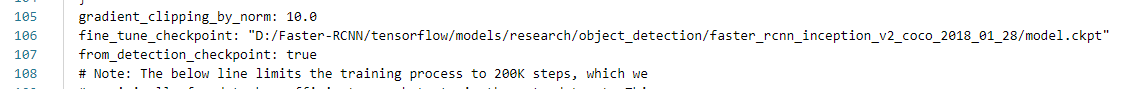

* Line 123: Write your input path of train.record path
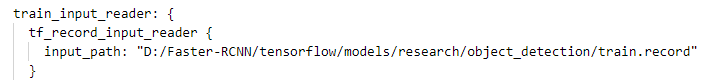

* Line 125: Write your label map path

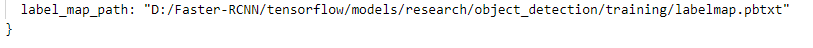

* Line 130: Write the count of your test images in models/research/images/test folder

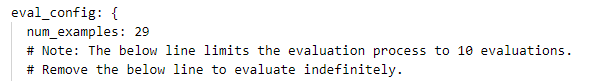

* Line 135: Write your input path of test.record path

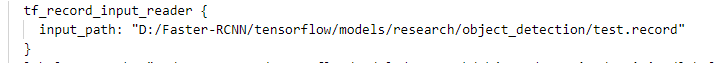

* Line 137: Write your label map path

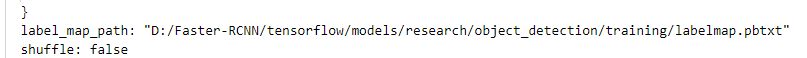

## Step 11. Train the model with train.py file
Before the training models/research/object_detection/inference_graph folder must be empty.

Since starting to train, run the command below in models/research/object_detection directory.

In [ ]:
python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

*When the training starts, you will see the following at the terminal;*
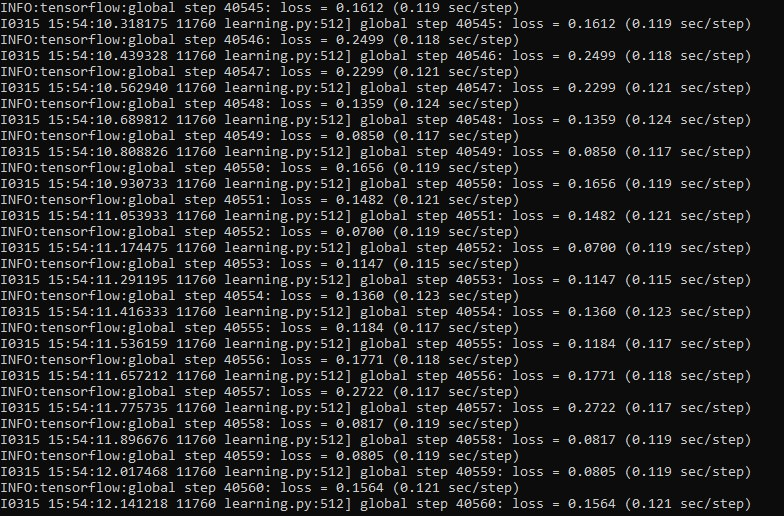

## Step 12: Inference Graph stage for test results with export_inference_graph.py

Write the number of the last model.ckpt model created in the inference_graph directory in the XXXX part of the command.

For example, the number of the model created as a result of the training can be assigned "0" as follows.

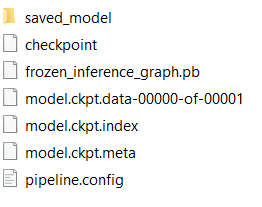

In [ ]:
python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-XXXX --output_directory inference_graph

While writing the Python code, when the idle is typed in the terminal, the idle screen appears.

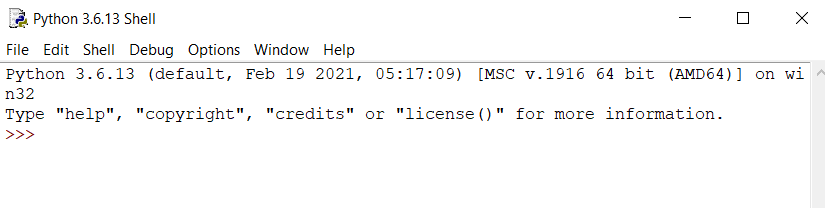



Choose File/Open... from the left corner of the idle. Selec the Object_detection_image.py file in directory models/research/object_detection from the screen that opens.

There are two options here. You can set the path of the test folder in the object_detection_image.py file, or you can move the image you want to test to the models/research / object_detection directory.

**Hint 🗝️** 

Here, the operations are carried out by moving the desired image to the test models / research / object_detection directory.

> IMAGE_NAME = 'yourtestimagename.JPG'

Write the number of classes the object detector can identify.

> NUM_CLASSES = 1

**Press F5 to Run Module**

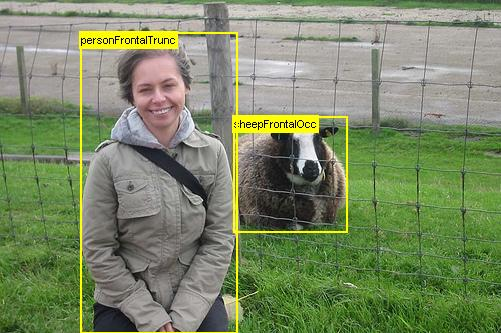

(http://host.robots.ox.ac.uk/pascal/VOC/voc2010/)